# 3.Twitter data to conduct NLP and sentiment analysis.

Data Source:https://www.kaggle.com/arkhoshghalb/twitter-sentiment-analysis-hatred-speech

Data files:
The data from train.csv will be will be used to train the model, as its name implies. I have used Natural Language processing,(NLP) for this project. The data from test.csv will be tested by the model MultinomialNB, built by us.NLP will be used to clean and pre-process the data, before vectorization.
 

Read data into a DataFrame, print the size of the DataFrame and the first few lines of data.

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import collections
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import nltk

In [97]:
train = pd.read_csv("train.csv")
print(train.shape)
train.head()

(31962, 3)


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


Get an overview of the data by finding the percentage of 'good' tweets (not racist/sexist) and the percentage of 'bad' tweets (racist/sexist). This helps us determine if there is enough representation of both types in the dataset.
Print the percentages.

In [98]:
countD = collections.defaultdict(int)
for data in train['label'] :
    countD[data] += 1 

for(k,v) in countD.items() :
    print(str(k) + ':' , round(v/len(train)*100,2), '%')

0: 92.99 %
1: 7.01 %


Find and plot the 10 most used hashtags for the good tweets and 10 most used hashtags for the bad tweets. The plot shows the hashtags and their counts.

['#love', '#positive', '#healthy', '#smile', '#thankful', '#fun', '#life', '#summer', '#model']


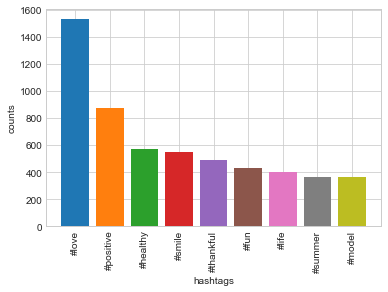

In [99]:
from nltk.tokenize import RegexpTokenizer

# for good tweets

good = train[train.label==0]
tokenizer = RegexpTokenizer('\#\w+')
l1 = []
for word in good['tweet']:
    hashtags = tokenizer.tokenize(str(word))
    l1=l1+hashtags
freqDict = nltk.FreqDist(l1)
print(list(freqDict)[0:9]) #Find the 10 most used hashtags for the good tweets
plt.style.use('seaborn-whitegrid')
for tag in list(freqDict)[0:9]: # Plot the 10 most used hashtags for the good tweets
    plt.bar(tag,freqDict[tag])
    plt.xlabel('hashtags')
    plt.ylabel('counts')
    plt.xticks(rotation=90)
    


['#trump', '#politics', '#allahsoil', '#libtard', '#liberal', '#sjw', '#retweet', '#black', '#miamiâ']


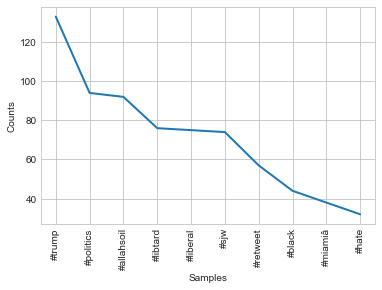

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [100]:
# for bad tweets

bad = train[train.label==1]
tokenizer = RegexpTokenizer('\#\w+')
l2 = []
for word in bad['tweet'] :
    hashtags = tokenizer.tokenize(str(word))
    l2=l2+hashtags
freqDict = nltk.FreqDist(l2)
print(list(freqDict)[0:9]) #Find the 10 most used hashtags for the good tweets
freqDict.plot(10)   # Plot the 10 most used hashtags for the good tweets
# Here you can see two ways of ploting the most used hashtags

Create the y variable from the DataFrame.
Print the size of y.

In [101]:
y = train.label
y.shape

(31962,)

Create the X variable from the DataFrame.
Print the size of X and the first few lines of x.

In [102]:
X = train[['tweet']]
print(X.shape)
X.head()

(31962, 1)


,tweet
0,@user when a father is dysfunctional and is s...
1,@user @user thanks for #lyft credit i can't us...
2,bihday your majesty
3,#model i love u take with u all the time in ...
4,factsguide: society now #motivation


## Pre-processing the data

The user names don't correlate with the labeling so to start pre-processing the data,you can remove them from the data.
Remove all @names from the data and show the first few lines of X to see that they're gone.
Vectorized strings can make the job easier.

In [103]:
l3=[]
for word in X.tweet:
        a = word.split(' ') #vectorized string operations
        b = [v for v in a if not v.startswith('@')]  #vectorized string operations
        c = ' '.join(b)
        l3.append(c)
X = pd.Series(l3).to_frame()
X.head()

,0
0,when a father is dysfunctional and is so self...
1,thanks for #lyft credit i can't use cause they...
2,bihday your majesty
3,#model i love u take with u all the time in ...
4,factsguide: society now #motivation


Continue the pre-processing step by 
 - removing non-words 
 - lowercase all words 
 - removing stop words 
 - stemming the words.
 
Print the resulting X variable. 

In [104]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


stop_words=set(stopwords.words("english"))
stemmer = PorterStemmer()
tokenizer = RegexpTokenizer('[a-zA-Z]+')

def preprocess(s) :
    w = tokenizer.tokenize(s.lower()) #removes non-words after lowercasing all words
    w = [word for word in w if word not in stop_words] # removes stop words
    w = [stemmer.stem(word) for word in w]  #stems the words
    return ' '.join(w)

X_processed = pd.Series([preprocess(X.loc[i,0]) for i in range(len(X))]).to_frame()
X_processed.head()

,0
0,father dysfunct selfish drag kid dysfunct run
1,thank lyft credit use caus offer wheelchair va...
2,bihday majesti
3,model love u take u time ur
4,factsguid societi motiv


 Convert the strings in X to vectors of numbers. Show the size of the vectors.

# Vectorization

In [105]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(X_processed[0])
X_vectors = vect.transform(X_processed[0])
print(X_vectors[0])
X_vectors.shape

  (0, 7558)	1
  (0, 7824)	2
  (0, 9012)	1
  (0, 14711)	1
  (0, 23484)	1
  (0, 24159)	1


(31962, 31307)

Split the dataset into training and testing sets and Show the size of the sets

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X_vectors,y,test_size=0.2)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(25569, 31307) (25569,) (6393, 31307) (6393,)


# Building the model

Use the Multinomial Naive Bayes model to train, then test the model.

In [107]:
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

The accuracy of the model is found and displayed by displaying the accuracy score, confusion matrix, and F1 score.

In [108]:
from sklearn.metrics import f1_score

print(metrics.accuracy_score(y_test, y_pred)) #  accuracy score
print(metrics.confusion_matrix(y_test, y_pred, labels=[0,1])) # confusion matrix
f1_score(y_test, y_pred, average='weighted')

0.9474425152510558
[[5798  145]
 [ 191  259]]


0.9461283419056581

Accuracy score = 0.9488503050211169 means the model was able to predict the results correctly 94% of the time.  Accuracy score is the rate of correct predictions.Out of every 100 predictions made, the model was correct 94 times.
It is used when we want to know the number of correct predictions, which is, when the algorithm correctly predicts a type T when it is actually type T. It takes into account all the possible classes and how much we predicted correctly.The score should be as high as possible.

Confusion matrix represents accurate predictions made along the diagonal of the matrix.

If there are values not on the diagonal, it means the classifier made a wrong prediction.It gives us an exact count of correct and incorrect predictions in each categoy, rather than the ratio or a percentage.Confusion matrix here shows that a total of 5830 'good tweets' were classified correctly while 150 
of them were wrongly classified to be bad tweets. A total of 236 bad tweets were classfied correctly,but 177  of them were wrongly classified as good tweets.The prediction is fairly accurate for good tweets but inaccurate for bad tweets.This could be due to a heavy bias towards good tweets,as they vastly outnumber(93%) the bad tweets(7%) in the given dataset,used for training the model.

The F1 score is a type of weighted  mean between precision and recall. 

It is used when the datasets don't have an equal representation for each type that's being classified.
F-score helps to measure Recall and Precision at the same time and makes two models with low precision and high recall or vice-versa, comparable.

For the above dataset, F1 score should be used because there is likely to be a bias in the workings of the model due to the fact that there is not enough representation of 'spam' types in the dataset. The percentages of type 'good' tweets' is 93% while that of 'bad tweets' is 7 %.
Due to this imbalance in the data(skewness), F-1 score is a better measure of accuracy,as it is the weighted mean that takes into account the imbalance of data.

# 'Testing the testing set'

Prepare the data in test.csv to test the model,just like we did for the training set.

Read the file "test.csv" into a DataFrame.

In [109]:
test = pd.read_csv("test.csv")
print(test.shape)
test.head()

(17197, 2)


,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


Drop all the NaN values


In [110]:
test.dropna(inplace=True)
test

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
...,...,...
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."


Create the X variable from the DataFrame.

Print the size of X and the first few lines of X.


In [111]:
X = test[['tweet']]
print(X.shape)
X.head()

(17197, 1)


,tweet
0,#studiolife #aislife #requires #passion #dedic...
1,@user #white #supremacists want everyone to s...
2,safe ways to heal your #acne!! #altwaystohe...
3,is the hp and the cursed child book up for res...
4,"3rd #bihday to my amazing, hilarious #nephew..."


Pre-process the data and remove the @names from the data as they don't correlate with the labeling,print the first few lines to see that they're gone.

In [112]:
l3=[]
for word in X.tweet:
        a = word.split(' ') #vectorized string operations
        b = [v for v in a if not v.startswith('@')]  #vectorized string operations
        c = ' '.join(b)
        l3.append(c)
Y = pd.Series(l3).to_frame()
Y.head()

,0
0,#studiolife #aislife #requires #passion #dedic...
1,#white #supremacists want everyone to see the...
2,safe ways to heal your #acne!! #altwaystohe...
3,is the hp and the cursed child book up for res...
4,"3rd #bihday to my amazing, hilarious #nephew..."


Continue the pre-processing step by removing non-words, lowercasing all words, removing stop words, 
and stemming the words. Print the resulting X variable.

In [113]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


stop_words=set(stopwords.words("english"))
stemmer = PorterStemmer()
tokenizer = RegexpTokenizer('[a-zA-Z]+')

def preprocess(s) :
    w = tokenizer.tokenize(s.lower()) #removes non-words after lowercasing all words
    w = [word for word in w if word not in stop_words] # removes stop words
    w = [stemmer.stem(word) for word in w]  #stems the words
    return ' '.join(w)

X_processed = pd.Series([preprocess(Y.loc[i,0]) for i in range(len(Y))]).to_frame()
X_processed.head()

,0
0,studiolif aislif requir passion dedic willpow ...
1,white supremacist want everyon see new bird movi
2,safe way heal acn altwaystoh healthi heal
3,hp curs child book reserv alreadi ye harrypott...
4,rd bihday amaz hilari nephew eli ahmir uncl da...


Convert the strings in X to vectors of numbers. Show the size of the vectors


In [114]:
X_vectors = vect.transform(X_processed[0])
print(X_vectors[0])
X_vectors.shape

  (0, 6670)	1
  (0, 9327)	1
  (0, 20514)	1
  (0, 22892)	1
  (0, 26193)	1


(17197, 31307)

Test the testing data,using the model built in 1i that analyzes tweets and determines if they're 
racist/sexist or not. The same accuracy level stands good for the model, as was found for the training set(train.csv)


In [115]:
y_pred = classifier.predict(X_vectors)
y_pred = pd.DataFrame(y_pred)
y_pred

,0
0,0
1,0
2,0
3,0
4,0
...,...
17192,1
17193,0
17194,0
17195,0


After we have the outcome of the test data, print the number of good tweets and the number of bad tweets that the model determined from the test data.
Based on the accuracy measurement of the model, we want to answer these questions, to have a fair assessment of the working of the model. 

- How confident are we with the 2 numbers?
- Is the model more likely to predict the wrong way for a good tweet? how about for a bad tweet?

Printing the outcome of the test data.

In [116]:
y_pred.columns = ['tweet']
tweet = {0:'Good',1:'Bad'}  #Change the numerical values into strings to describe the data.
y_pred.replace(tweet,inplace=True)


countD = collections.defaultdict(int)
for data in y_pred['tweet'] :
    countD[data] += 1 

for(k,v) in countD.items() :
    print(k,v) #Print the number of good and bad tweets

Good 16470
Bad 727


# Final analysis

I am very confident with the number of good tweets,but not very confident with the number of bad tweets. 

As this is a test data only, it will not have any Confusion matrix, accuracy score or f1 score.This model is built by us in the previous steps and we are now using it to test our testing dataset.Accuracy of the model is about 94%-95%, as we found both according to accuracy score and F1 score.
Since we are using the model trained above, we are taking the accuracy levels(all 3)as displayed for it, but the high accuracy level works for good tweets only, because there is imbalance in the training data. A very high occurrence of good tweets(93%) in the training dataset leads to an imbalanced 
dataset and because it can calculate probabilities, our model learns the wrong way and makes incorrect predictions for bad tweets, but is right in predicting good tweets almost 93%-94% of the time, which is the accuracy level of the model.

On a lighter note, it is heartening to note that the overwhelmingly large number of good tweets indicate that only a handful of people create a bad name and spread hate in the world! The world is still a wondderful place to live in. :) 